In [34]:
#def MULTI(X_train,y_train,X_test,y_test):
#"svm_kernel_ovo = OneVsOneClassifier(SVC(kernel='linear', C=1)).fit(X_train, y_train)
#"svm_kernel_ovr = OneVsRestClassifier(SVC(kernel='linear', C=1)).fit(X_train, y_train)
#"svm_linear_ovo = OneVsOneClassifier(LinearSVC(C=1),).fit(X_train, y_train)
#"svm_linear_ovr = OneVsRestClassifier(LinearSVC(C=1)).fit(X_train, y_train)
# model accuracy for svc model
#accuracy = svm_kernel_ovr.score(X_test, y_test)
#print('Linear Kernel OneVsRest SVM accuracy: ' + str(accuracy))
#accuracy = svm_kernel_ovo.score(X_test, y_test)
#print('Linear Kernel OneVsOne SVM accuracy: ' + str(accuracy))
# model accuracy for svc model
#accuracy = svm_linear_ovr.score(X_test, y_test)
#print('LinearSVC OneVsRest SVM accuracy: ' + str(accuracy))
#accuracy = svm_linear_ovo.score(X_test, y_test)
#print('LinearSVC OneVsOne SVM accuracy: ' + str(accuracy))


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pickle

In [36]:
def FeatureScalling(X):
  for column in X.columns:
    X[column] = (X[column] - X[column].min()) /(X[column].max() - X[column].min())
  return X


In [37]:

def LogisticRegressionModel(X_train,y_train,X_test,y_test,max_iter):
    model =LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Mean Square Error:', metrics.mean_squared_error(y_test, prediction))
    print('Accuracy :', metrics.accuracy_score(y_test, prediction)) 

# **Load Data**


In [38]:
taxi_data=pd.read_csv('taxi-rides-classification.csv')
#taxi_data=pd.read_csv('taxi-rides.csv')
taxi_data.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap


<AxesSubplot:xlabel='cab_type', ylabel='count'>

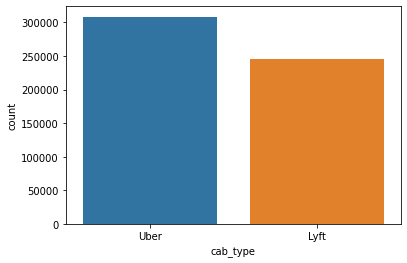

In [39]:
sns.countplot(x='cab_type', data=taxi_data)


In [40]:
#sns.countplot(data=taxi_data, x="distance", y="RideCategory",hue='name')

In [41]:
#sns.scatterplot(data=taxi_data, x="distance", y="price",hue='cab_type')

In [42]:
taxi_data.count()

distance            554456
cab_type            554456
time_stamp          554456
destination         554456
source              554456
surge_multiplier    554456
id                  554456
product_id          554456
name                554456
RideCategory        554456
dtype: int64

In [43]:
taxi_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
RideCategory        0
dtype: int64

In [44]:
taxi_data.duplicated().sum()

0

In [45]:
weather_data=pd.read_csv('weather.csv')
#weather_data=pd.read_csv('weather.csv')
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [46]:
weather_data.count()

temp          6276
location      6276
clouds        6276
pressure      6276
rain           894
time_stamp    6276
humidity      6276
wind          6276
dtype: int64

In [47]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [48]:
#weather_data.fillna(0,inplace=True)
weather_data.drop(['rain'],axis=1,inplace=True)
weather_data.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49


In [49]:
weather_data.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
time_stamp    0
humidity      0
wind          0
dtype: int64

In [50]:
weather_data.duplicated().sum()

0

#**Feature Engineering**

In [51]:
#convert time stamp to date in taxi and weather and add it to key column
taxi_data['key'] = pd.to_datetime(taxi_data['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y/%m/%d')))
weather_data['key']=pd.to_datetime(weather_data['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y/%m/%d')))
weather_data.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind,key
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25,2018/12/16
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32,2018/12/16
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07,2018/12/16
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09,2018/12/16
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49,2018/12/16


In [52]:
taxi_data['trip_hour'] = pd.to_datetime(taxi_data['time_stamp'], unit='ms').dt.hour
taxi_data.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory,key,trip_hour
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown,2018/12/14,6
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap,2018/11/28,10
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate,2018/12/16,0
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive,2018/11/30,23
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap,2018/11/30,12


In [53]:
#groub by  date  w  location then take average for other columns
weather=weather_data.groupby(['key','location']).agg({'temp':'mean','clouds':'mean','pressure':'mean','humidity':'mean','wind':'mean'}).reset_index()

In [54]:
Data=taxi_data.merge(weather,how='left',left_on=['source','key'], right_on=['location','key'])
Data=Data.merge(weather,how='left',left_on=['destination','key'], right_on=['location','key'])

In [55]:
#Data_source.drop(['location','key'],axis=1,inplace=True)
Data.drop(['key','location_x','location_y','destination','source'],axis=1,inplace=True)

In [56]:
Data['trip_hour'] = pd.to_datetime(Data['time_stamp'], unit='ms').dt.hour

In [57]:
weather.duplicated().sum()

0

In [58]:
Data.head()

,distance,cab_type,time_stamp,surge_multiplier,id,product_id,name,RideCategory,trip_hour,temp_x,clouds_x,pressure_x,humidity_x,wind_x,temp_y,clouds_y,pressure_y,humidity_y,wind_y
0,0.62,Uber,1.544770e+12,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown,6,33.927917,0.495000,1032.779583,0.727083,3.037083,33.811667,0.495000,1032.762917,0.731250,3.026250
1,2.27,Uber,1.543400e+12,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap,10,37.098861,0.533924,992.196709,0.731392,7.808861,37.127848,0.541519,992.227722,0.729873,7.728481
2,2.00,Lyft,1.544920e+12,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate,0,41.034167,0.691667,1020.190833,0.735417,8.290417,41.039583,0.686667,1020.168333,0.734583,8.198333
3,3.98,Lyft,1.543620e+12,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive,23,35.585600,0.291200,1015.532800,0.714000,3.774000,35.612800,0.290800,1015.528400,0.714000,3.805200
4,1.49,Lyft,1.543580e+12,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap,12,35.585600,0.291200,1015.532800,0.714000,3.774000,35.646800,0.290800,1015.540400,0.711600,3.780800


# **Label encoding**

In [59]:
Data['cab_type']=Data.cab_type.map(dict(Uber=0,Lyft=1))

In [60]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_name = pd.DataFrame(encoder.fit_transform(Data[['name']]).toarray())
Data = Data.join(encoder_name)
Data=Data.rename(columns={0: "name0", 1: "name1", 2: "name2" , 3 :'name3' , 4: "name4", 5: "name5", 6: "name6" , 7 :'name7' ,8: "name8", 9: "name9", 10: "name10" , 11 :'name11',12:'name12'})
Data.drop('name',axis=1,inplace=True)

ValueError: could not convert string to float: 'c1b4a572-24b2-484d-aac5-b4f97b790480'

In [ ]:
#save model
with open('encoder', 'wb') as files:
    pickle.dump(encoder, files)

In [ ]:
Data.head()

,distance,cab_type,time_stamp,surge_multiplier,id,product_id,RideCategory,trip_hour,temp_x,clouds_x,...,name3,name4,name5,name6,name7,name8,name9,name10,name11,name12
0,0.62,0,1.544770e+12,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,unknown,6,33.927917,0.495000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.27,0,1.543400e+12,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,cheap,10,37.098861,0.533924,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.00,1,1.544920e+12,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,moderate,0,41.034167,0.691667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.98,1,1.543620e+12,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,expensive,23,35.585600,0.291200,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.49,1,1.543580e+12,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,cheap,12,35.585600,0.291200,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Data['RideCategory']=Data.RideCategory.map(dict(cheap=0,moderate=1,expensive=2,veryExpensive=3,unknown=4))
le =LabelEncoder()
Data['RideCategory']=le.fit_transform(Data['RideCategory'])





In [ ]:
with open('le_encode', 'wb') as files:
    pickle.dump(le, files)

#**Feature selection**

In [ ]:
Data.corr()

,distance,cab_type,time_stamp,surge_multiplier,RideCategory,trip_hour,temp_x,clouds_x,pressure_x,humidity_x,...,name3,name4,name5,name6,name7,name8,name9,name10,name11,name12
distance,1.000000,-0.001691,0.002804,0.024511,0.288475,0.002669,-0.005272,0.000026,0.003320,-0.003649,...,0.000035,-0.001315,-0.000773,-0.000708,-0.000624,0.000616,-0.000001,0.000585,0.000887,0.000489
cab_type,-0.001691,1.000000,-0.000933,0.169754,-0.015637,0.001473,0.001019,-0.002382,0.000403,-0.001368,...,0.316610,0.316351,0.316501,0.317030,0.315776,-0.262615,-0.262528,-0.262838,-0.262124,-0.262256
time_stamp,0.002804,-0.000933,1.000000,0.000797,0.000190,0.010053,-0.308464,-0.019154,0.556988,-0.265948,...,0.000465,-0.000125,-0.000476,-0.000379,0.000648,0.000770,0.000560,0.002936,-0.000713,-0.001380
surge_multiplier,0.024511,0.169754,0.000797,1.000000,0.136290,-0.000044,-0.000395,0.000114,-0.002673,-0.000364,...,0.070661,0.071937,0.075596,0.075525,-0.042746,-0.044580,-0.044565,-0.044618,-0.044497,-0.044519
RideCategory,0.288475,-0.015637,0.000190,0.136290,1.000000,0.001560,-0.000674,0.002280,-0.000420,0.000009,...,0.048345,0.286911,-0.134181,0.050521,-0.318991,0.361925,-0.223499,-0.171758,0.049110,-0.172217
trip_hour,0.002669,0.001473,0.010053,-0.000044,0.001560,1.000000,-0.013575,0.064842,0.000751,0.098137,...,-0.000370,0.001813,0.001096,0.000513,-0.000121,0.000724,-0.000932,-0.001556,-0.000465,0.001927
temp_x,-0.005272,0.001019,-0.308464,-0.000395,-0.000674,-0.013575,1.000000,0.640732,-0.394483,0.738031,...,-0.000670,-0.000988,0.000612,0.001312,0.001521,0.000167,0.000316,-0.001483,-0.001185,-0.000401
clouds_x,0.000026,-0.002382,-0.019154,0.000114,0.002280,0.064842,0.640732,1.000000,-0.259531,0.829664,...,-0.001876,-0.001215,-0.001006,0.002584,-0.000639,0.000918,-0.000297,0.001043,-0.000008,0.000142
pressure_x,0.003320,0.000403,0.556988,-0.002673,-0.000420,0.000751,-0.394483,-0.259531,1.000000,-0.231887,...,0.001117,0.001020,0.001284,-0.001886,-0.000744,0.000708,-0.000186,0.001767,-0.000683,-0.000866
humidity_x,-0.003649,-0.001368,-0.265948,-0.000364,0.000009,0.098137,0.738031,0.829664,-0.231887,1.000000,...,-0.001595,-0.001555,-0.000097,0.001601,-0.000198,0.000806,0.000357,-0.000587,-0.000482,0.000941


<AxesSubplot:>

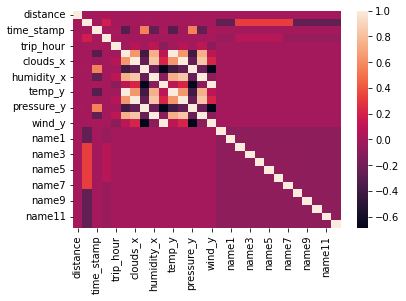

In [ ]:
sns.heatmap(Data.corr())

In [63]:
Data=Data.drop(['id','product_id','time_stamp'],axis=1,inplace=False)
Data.head()

,distance,cab_type,surge_multiplier,RideCategory,trip_hour,temp_x,clouds_x,pressure_x,humidity_x,wind_x,...,name3,name4,name5,name6,name7,name8,name9,name10,name11,name12
0,0.62,0,1.0,3,6,33.927917,0.495000,1032.779583,0.727083,3.037083,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.27,0,1.0,0,10,37.098861,0.533924,992.196709,0.731392,7.808861,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.00,1,1.0,2,0,41.034167,0.691667,1020.190833,0.735417,8.290417,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.98,1,1.0,1,23,35.585600,0.291200,1015.532800,0.714000,3.774000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.49,1,1.0,0,12,35.585600,0.291200,1015.532800,0.714000,3.774000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X=Data.drop(['RideCategory'],axis=1,inplace=False)
#X=FeatureScalling(X)
min_max=MinMaxScaler()
X=min_max.fit_transform(X)

y=Data['RideCategory']#label

In [ ]:
with open('min_max', 'wb') as files:
    pickle.dump(min_max, files)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [ ]:
#Random forest classfier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
preds=rf.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test, preds)) 

Accuracy : 0.8786138982908193


In [ ]:
feature_names = X_train.columns
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(20, 10))
forest_importances.to_frame().sort_values(by=0, ascending=False).plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
!pip install catboost

You should consider upgrading via the 'C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


#models


In [ ]:
#LogisticRegressionModel(X_train,y_train,X_test,y_test,100)

Mean Square Error: 0.5041692467701113
Accuracy : 0.8735639094128186


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#LogisticRegressionModel(X_train,y_train,X_test,y_test,500)

Mean Square Error: 0.4991853886988463
Accuracy : 0.8752592628218616


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**catboost model**

In [65]:
from catboost import CatBoostClassifier
cat_clf=CatBoostClassifier()
X=Data.drop(['RideCategory'],axis=1,inplace=False)
X=min_max.transform(X)
y=Data['RideCategory']#label
cat_clf.fit(X,y)
preds=cat_clf.predict(X)
print('Accuracy :', metrics.accuracy_score(y, preds))

Learning rate set to 0.10921
0:	learn: 1.4174576	total: 346ms	remaining: 5m 45s
1:	learn: 1.2870396	total: 535ms	remaining: 4m 26s
2:	learn: 1.1879241	total: 744ms	remaining: 4m 7s
3:	learn: 1.1000293	total: 937ms	remaining: 3m 53s
4:	learn: 1.0319624	total: 1.1s	remaining: 3m 39s
5:	learn: 0.9649891	total: 1.25s	remaining: 3m 27s
6:	learn: 0.9079884	total: 1.44s	remaining: 3m 23s
7:	learn: 0.8596361	total: 1.6s	remaining: 3m 18s
8:	learn: 0.8158697	total: 1.77s	remaining: 3m 14s
9:	learn: 0.7785063	total: 1.92s	remaining: 3m 10s
10:	learn: 0.7444589	total: 2.09s	remaining: 3m 7s
11:	learn: 0.7121107	total: 2.23s	remaining: 3m 3s
12:	learn: 0.6792391	total: 2.38s	remaining: 3m
13:	learn: 0.6538706	total: 2.52s	remaining: 2m 57s
14:	learn: 0.6283726	total: 2.67s	remaining: 2m 55s
15:	learn: 0.6071887	total: 2.81s	remaining: 2m 52s
16:	learn: 0.5888453	total: 2.96s	remaining: 2m 50s
17:	learn: 0.5688970	total: 3.1s	remaining: 2m 48s
18:	learn: 0.5521827	total: 3.25s	remaining: 2m 47s
19:

In [66]:
with open('cat_model2', 'wb') as files:
    pickle.dump(cat_clf, files)

In [3]:
def TestCsv(test_data,train_data,model,weather_data,encoder,le,min_max):


  #fill null values

  test_data['distance'].fillna(train_data['distance'].mean())
  test_data['cab_type'].fillna(train_data['cab_type'].mode())
  test_data['time_stamp'].fillna(train_data['time_stamp'].mode())
  test_data['destination'].fillna(train_data['destination'].mode())
  test_data['source'].fillna(train_data['source'].mode())
  test_data['surge_multiplier'].fillna(train_data['surge_multiplier'].mean())
  
  test_data['name'].fillna(train_data['name'].mode())
  test_data['RideCategory'].fillna(train_data['RideCategory'].mode())

  #merge taxi data and weather
  test_data['key'] = pd.to_datetime(test_data['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y/%m/%d')))
  weather_data['key']=pd.to_datetime(weather_data['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y/%m/%d')))
  test_data['trip_hour'] = pd.to_datetime(test_data['time_stamp'], unit='ms').dt.hour
  weather=weather_data.groupby(['key','location']).agg({'temp':'mean','clouds':'mean','pressure':'mean','humidity':'mean','wind':'mean'}).reset_index()
  test=test_data.merge(weather,how='left',left_on=['source','key'], right_on=['location','key'])
  test=test.merge(weather,how='left',left_on=['destination','key'], right_on=['location','key'])
  test.drop(['key','location_x','location_y','destination','source'],axis=1,inplace=True)
  
  #drop non helpfull features
  test=test.drop(['id','product_id','time_stamp'],axis=1,inplace=False)
  
  #map cab type  to 0 when uber and 1 if Lyft
  test['cab_type']=test.cab_type.map(dict(Uber=0,Lyft=1)) 

  #label encoding for ridge category
  test['RideCategory']=le.transform(test['RideCategory'])

  #label encoding for name category
  encoder_name = pd.DataFrame(encoder.transform(test[['name']]).toarray())
  test = test.join(encoder_name)
  test=test.rename(columns={0: "name0", 1: "name1", 2: "name2" , 3 :'name3' , 4: "name4", 5: "name5", 6: "name6" , 7 :'name7' ,8: "name8", 9: "name9", 10: "name10" , 11 :'name11',12:'name12'})
  test.drop('name',axis=1,inplace=True)

  #scaling data

  X=test.drop(['RideCategory'],axis=1,inplace=False)
  X=min_max.transform(X)
  y=test['RideCategory']#label

  preds=model.predict(X)
  print('Accuracy :', metrics.accuracy_score(y, preds)) 
  

  
  


In [4]:
#test senario
with open('le_encode' , 'rb') as f:
    le= pickle.load(f)

# load encoder for one hot encoding for name 
with open('encoder' , 'rb') as f:
    encoder= pickle.load(f)

with open('cat_model2' , 'rb') as f:
    model= pickle.load(f)

with open('min_max' , 'rb') as f:
    min_max= pickle.load(f)

train_data=pd.read_csv(("taxi-rides-classification.csv"))

test_data=pd.read_csv("taxi-tas-classification-test.csv")
weather_data=pd.read_csv('weather.csv')
TestCsv(test_data=test_data,train_data=train_data,model=model,weather_data=weather_data,encoder=encoder,le=le,min_max=min_max)

Accuracy : 0.8820413017623527


In [36]:
LabelEncode=LabelEncoder()
LabelEncode.fit_transform(train_data['RideCategory'])
LabelEncode.transform(test['RideCategory'])

array([1, 0, 0, 3])

In [37]:
with open('le_encode', 'wb') as files:
    pickle.dump(LabelEncode, files)